In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package (in LPA)')

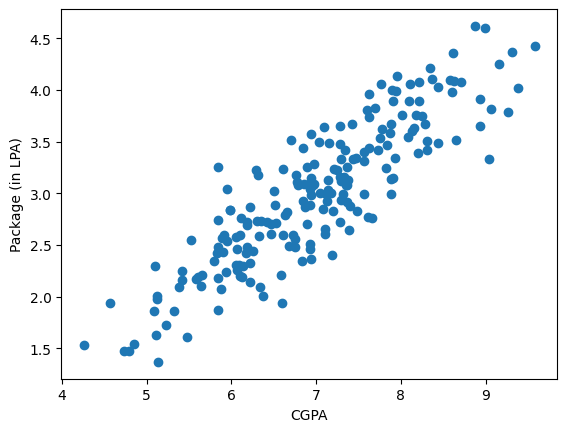

In [4]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [6]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]
X.head()

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94


In [7]:
y.head()

0    3.26
1    1.98
2    3.25
3    3.67
4    3.57
Name: package, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: ", X_train.shape)
print(f"X_test shape: ", X_test.shape)
print(f"y_train shape: ", y_train.shape)
print(f"X_test shape: ", X_test.shape)

X_train shape:  (160, 1)
X_test shape:  (40, 1)
y_train shape:  (160,)
X_test shape:  (40, 1)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
X_test[:4]

,cgpa
95,6.63
15,7.25
30,7.36
158,5.95


In [23]:
y_test[:4]

95     2.79
15     3.23
30     3.26
158    3.04
Name: package, dtype: float64

In [26]:
for i in range(0, 3):
    print(lr.predict(X_test.iloc[i].values.reshape(1, 1)))

[2.78031348]
[3.13635249]
[3.1995207]


C:\Users\15105\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\15105\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\15105\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Package (in LPA)')

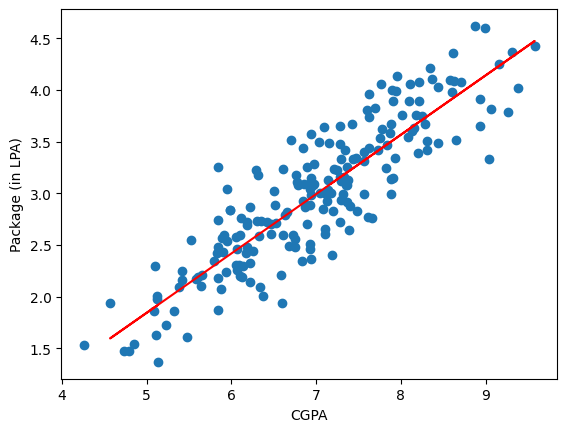

In [28]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [31]:
# Coefficient 
# m value
m = lr.coef_
m

array([0.57425647])

In [33]:
# b value
b = lr.intercept_
b

-1.0270069374542108

In [34]:
# y = mx + b
# for X_test 0
m * 6.63 + b

array([2.78031348])

In [36]:
# our own student with 9.5 cgpa
m * 9.5 + b

array([4.42842955])

In [37]:
# cgpa with 100
m * 100 + b

array([56.39864033])

# Class for Simple Linear Regression

In [53]:
class MyLR:

    def __init__(self):
        self.m = None
        self.b = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num += ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
            den += ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))

        self.m = num / den
        self.b = y_train.mean() - (self.m * X_train.mean())
        # print(self.m)
        # print(self.b)

    def predict(self, X_test):
        return (self.m * X_test) + self.b

In [38]:
import numpy as np
import pandas as pd

df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [39]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [40]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(
    f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (160,)
X_test shape: (40,)
y_train shape: (160,)
y_test shape: (40,)


In [54]:
lr = MyLR()
lr.fit(X_train, y_train)

In [55]:
print(X_test[0])

6.63


In [56]:
lr.predict(X_test[0])

2.7803134765595168

In [57]:
y_test[0]

2.79

In [58]:
class MeraLR:

    def __init__(self):
        self.b = None
        self.m = None

    def fit(self, X_train, y_train):
        num = 0
        den = 0

        num += (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
        den += (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

        self.m = num / den
        self.b = y_train.mean() - self.m * X_train.mean()

    def predict(self, X_test):
        return (self.m * X_test) + self.b


In [59]:
new_lr = MeraLR()
new_lr.fit(X_train, y_train)

In [61]:
X_test[0]

6.63

In [60]:
new_lr.predict(X_test[0])

2.678737322907795

# Regression Metrics 

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [80]:
X = df.iloc[:, 0:1]
y = df.iloc[:, -1]

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(
    f"X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}")

X_train shape: (160, 1)
y_train shape: (160,)
X_test shape: (40, 1)
y_test shape: (40,)


In [82]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Text(0, 0.5, 'Package (in LPA)')

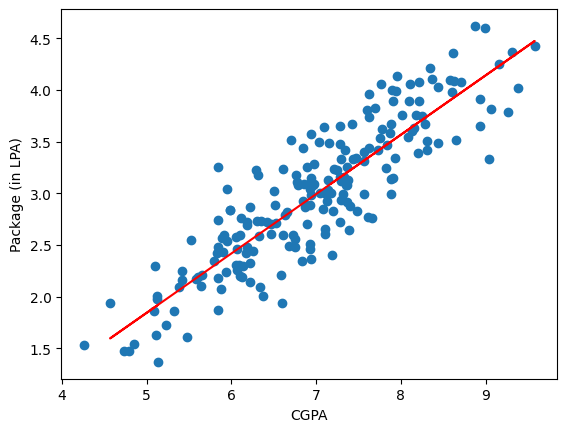

In [83]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in LPA)')

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr.predict(X_test)
y_pred

array([2.78031348, 3.13635249, 3.1995207 , 2.38981908, 3.52684689,
       3.76803461, 3.16506531, 2.54486832, 3.17655044, 3.4923915 ,
       1.90744364, 2.34962112, 3.6876387 , 2.75734322, 3.47516381,
       3.04447145, 2.32665086, 3.20526327, 2.17734418, 3.314372  ,
       2.45298729, 2.90090734, 3.32011456, 2.87219451, 3.33734226,
       2.19457187, 1.41932564, 2.7114027 , 3.18229301, 2.32665086,
       3.74506435, 2.95833298, 3.68189614, 2.97556068, 2.59080884,
       3.34882738, 2.47595755, 3.07318428, 4.17575671, 2.95833298])

In [85]:
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [92]:
print(f'MAE: {mean_absolute_error(y_test, y_pred):.4f} LPA')

MAE: 0.2315 LPA


In [91]:
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  0.08417638361329656


In [97]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f} LPA')

RMSE: 0.2901 LPA


In [103]:
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

R2 Score: 0.7730984312051673


In [104]:
# Adjusted R2 score
print(X_test.shape)

(40, 1)


In [105]:
print(f'Adjusted R2 score: {1 - ((1 - r2) * (40 - 1) / (40 - 1 - 1))}')

Adjusted R2 score: 0.7671273372895138


In [107]:
# Adding a random col
# r2 score will increase and Adj r2 score will decrease

new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.748139,3.26
1,5.12,0.728483,1.98
2,7.82,0.618318,3.25
3,7.42,0.771897,3.67
4,6.94,0.159618,3.57


Text(0, 0.5, 'Package(in lpa)')

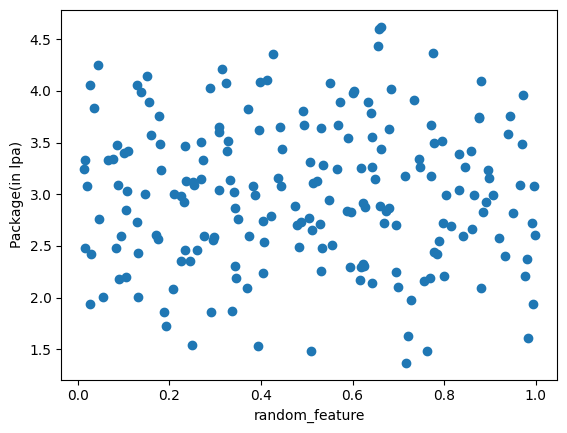

In [108]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [109]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [111]:
lr = LinearRegression()

In [112]:
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
y_pred = lr.predict(X_test)

In [114]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7760529918130501


In [115]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7639477481272691

In [116]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [117]:
new_df2.sample(5)

,cgpa,iq,package
65,7.60,3.81,3.81
82,5.58,1.07,2.17
98,7.69,2.93,3.83
138,7.91,3.39,3.89
140,7.91,2.15,3.15


Text(0, 0.5, 'Package(in lpa)')

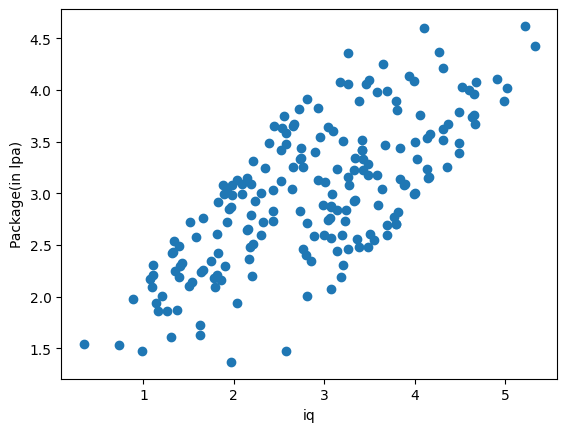

In [118]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [119]:
np.random.randint(-100,100)

58

In [120]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [122]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [123]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8537192556066133


In [124]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8458121883421059